# Devoir à la maison - Python for data science

## b. Code pour modélisation 

### A. Data visualisation

Nous commencons par importer l'ensemble des librairies qui nous seront utiles par la suite : 

In [ ]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier
from collections import OrderedDict
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



<blockquote> Nous allons commencer par étudier le format dataset avec un premier individu. La première étape est l'import du fichier .pkl
On affiche ensuite le contenu de celui-ci.</blockquote>


In [29]:
path="/Users/marvin/Documents/Data_Science/PPG_FieldStudy/S1/S1.pkl"
data = pd.read_pickle(path)
data

{'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224],
       dtype=int32),
 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
          [ 0.8556    , -0.06900001, -0.3646    ],
          [ 0.852     , -0.07020003, -0.3642    ],
          ...,
          [ 0.88759995, -0.1038    , -0.27920002],
          [ 0.88619995, -0.10159999, -0.27819997],
          [ 0.88680005, -0.10140002, -0.27380002]]),
   'ECG': array([[0.01560974],
          [0.01812744],
          [0.01753235],
          ...,
          [0.21368408],
          [0.21556091],
          [0.21702576]]),
   'EMG': array([[-1.5],
          [-1.5],
          [-1.5],
          ...,
          [-1.5],
          [-1.5],
          [-1.5]]),
   'EDA': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'Temp': array([[-273.15],
          [-273.15],
          [-273.15],
          ...,
          [-273.15],
          [-273.15],
    

<blockquote> Ici on affiche les clés du dictionnaire qui contiennent les différentes parties de notre étude. </blockquote>


In [235]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [237]:
print(f"La 1ere clé, 'rpeaks' est le R-peak, un élément clé dan la détection d'anomalies cardio-vasculaires : {data['rpeaks']}")
print(f"son types est : {type(data['rpeaks'])}")

La 1ere clé, 'rpeaks' est le R-peak, un élément clé dan la détection d'anomalies cardio-vasculaires : [    240    1174    2128 ... 6447292 6447748 6448224]
son types est : <class 'numpy.ndarray'>


In [238]:
print(f"La 2nde 'signal' est le signal : {data['signal']}")
print(f"son types est : {type(data['signal'])}")

La 2nde 'signal' est le signal : {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]]), 'ECG': array([[0.01560974],
       [0.01812744],
       [0.01753235],
       ...,
       [0.21368408],
       [0.21556091],
       [0.21702576]]), 'EMG': array([[-1.5],
       [-1.5],
       [-1.5],
       ...,
       [-1.5],
       [-1.5],
       [-1.5]]), 'EDA': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), 'Temp': array([[-273.15],
       [-273.15],
       [-273.15],
       ...,
       [-273.15],
       [-273.15],
       [-273.15]], dtype=float32), 'Resp': array([[ 4.4418335 ],
       [ 4.45098877],
       [ 4.47387695],
       ...,
       [-3.05023193],
       [-3.05328369],
       [-3.0563

In [ ]:
print(f"La 3e, 'label' représente le nombre de bpm à chaque enregistrement : {data['label']}")
print(f"son types est : {type(data['label'])}")

In [ ]:
print(f"La 4e  'activity' repésente l'activité pratiquée à chaque mesure : {data['activity']}")
print(f"son types est : {type(data['activity'])}")

In [ ]:
print(f"La 5e, 'questionnaire'  repésente les différents attributs de la personne étudiée : {data['questionnaire']}")
print(f"son types est : {type(data['questionnaire'])}")

In [ ]:
print(f"La dernière, 'subject'  repésente l'identifiant de la personne étudiée : {data['subject']}")
print(f"son types est : {type(data['subject'])}")

In [245]:
def plt_features(data,name_column):
  sns.set_style('whitegrid')
  flatui = ["#7F7FFF","#CCCCFF"] 
  unique, counts = np.unique(data[name_column], return_counts=True)
  dict(zip(unique, counts))
  # plt.figure(figsize=(10,5))
  sns.barplot(unique, counts,palette = flatui, alpha=0.8)
  for i in range(len(unique)):
    plt.text(x = unique[i]-0.2 , y = counts[i]+10, s = counts[i], size = 10)
    plt.title('Activités')
    plt.ylabel("Nombres de mesures", fontsize=12)
    plt.xlabel('Numéro des activités', fontsize=12)
    plt.show()

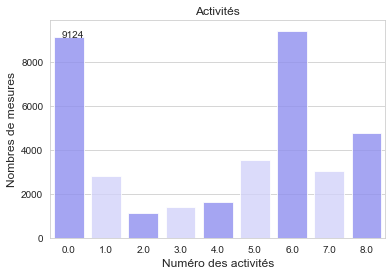

ValueError: Image size of 391x611057 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 674x251846 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 1009x302293 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 1344x360566 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 1678x775442 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 2013x2050510 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 2348x658024 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

ValueError: Image size of 2682x1036370 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [246]:
plt_features(data,'activity')

Ici, on va créer des dataframes pour jouer un peu avec pandas 

In [247]:
df_rpeaks = pd.DataFrame(data['rpeaks']) 
df_signal = pd.DataFrame(data['signal']) 
df_label = pd.DataFrame(data['label']) 
df_activity = pd.DataFrame(data['activity']) 

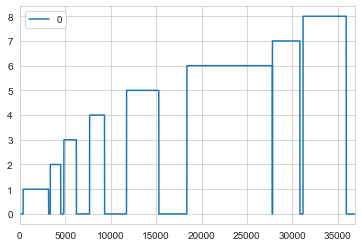

In [248]:
df_activity.plot( use_index=True)

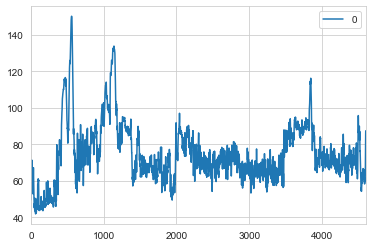

In [249]:
df_label.plot( use_index=True)

On va maintenant créer un unique dataframe avec l'ensemble des personnes de l'observation

In [250]:
def PklToDf(data):
    clean_data = {}
    clean_data["Subject"]=data["subject"]
    clean_data["Weight"]=data["questionnaire"]["WEIGHT"]
    clean_data["Gender"]=data["questionnaire"]["Gender"]
    clean_data["Age"]=data["questionnaire"]["AGE"]
    clean_data["Height"]=data["questionnaire"]["HEIGHT"]
    clean_data["Skin"]=data["questionnaire"]["SKIN"]
    clean_data["Sport"]=data["questionnaire"]["SPORT"]
    clean_data["activity"]=np.squeeze(data["activity"])[::4]
    clean_data["respiration"]=np.squeeze(data["signal"]["chest"]["Resp"])[::700]
    clean_data["ACC_w_x"] =np.squeeze(data["signal"]["wrist"]["ACC"])[::32,0]
    clean_data["ACC_w_y"] =np.squeeze(data["signal"]["wrist"]["ACC"])[::32,1]
    clean_data["ACC_w_z"] =np.squeeze(data["signal"]["wrist"]["ACC"])[::32,2]
    clean_data["temp"] =np.squeeze(data["signal"]["wrist"]["TEMP"])[::4]
    clean_data["respiration"]=np.squeeze(data["signal"]["chest"]["Resp"])[::700]
    clean_data["ECG"]=np.squeeze(data["signal"]["chest"]["ECG"])[::700]
    clean_data["ACC_x"] =np.squeeze(data["signal"]["chest"]["ACC"])[::700,0]
    clean_data["ACC_y"] =np.squeeze(data["signal"]["chest"]["ACC"])[::700,1]
    clean_data["ACC_z"] =np.squeeze(data["signal"]["chest"]["ACC"])[::700,2]
    label_result=[]
    for i in range(len(data["label"])):
        label_result.append(data["label"][i])
        label_result.append(data["label"][i])
    for i in range(abs(len(label_result)-len(clean_data["activity"]))):
        label_result.append(data["label"][len(data["label"])-1])
    clean_data["label"]=np.squeeze(label_result)
    df = pd.DataFrame.from_dict(clean_data)
    return df

,Subject,Weight,Gender,Age,Height,Skin,Sport,activity,respiration,ACC_w_x,ACC_w_y,ACC_w_z,temp,ECG,ACC_x,ACC_y,ACC_z,label
0,S2,80.0,m,28,189.0,3,5,0.0,-3.038025,-0.562500,0.046875,0.843750,31.67,-0.025040,0.9114,0.0322,0.0510,70.922966
1,S2,80.0,m,28,189.0,3,5,0.0,-4.527283,-0.562500,0.046875,0.843750,31.69,1.484116,0.9176,0.0354,0.0840,70.922966
2,S2,80.0,m,28,189.0,3,5,0.0,2.076721,-0.562500,0.062500,0.843750,31.67,-0.059372,0.8708,0.0704,0.0586,71.291055
3,S2,80.0,m,28,189.0,3,5,0.0,4.002380,-1.000000,0.156250,0.546875,31.67,0.356003,0.8716,0.0190,-0.0360,71.291055
4,S2,80.0,m,28,189.0,3,5,0.0,3.683472,-1.187500,-0.187500,0.125000,31.69,0.625900,0.9070,0.1154,0.0770,68.693833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8200,S2,80.0,m,28,189.0,3,5,0.0,1.173401,-0.921875,-0.390625,0.093750,35.11,0.108124,0.9178,0.0226,-0.0318,96.844385
8201,S2,80.0,m,28,189.0,3,5,0.0,-2.362061,-0.921875,-0.375000,0.109375,35.11,-0.243713,0.9192,0.0276,-0.0080,96.844385
8202,S2,80.0,m,28,189.0,3,5,0.0,2.848816,-0.843750,-0.453125,0.109375,35.11,-0.108215,0.9078,0.0242,-0.0678,96.844385
8203,S2,80.0,m,28,189.0,3,5,0.0,1.606750,-0.921875,-0.421875,0.140625,35.11,-1.217789,1.0554,0.3262,0.1874,96.844385


In [251]:
df_list = list()
for i in range (1,16):
    path = "/Users/marvin/Documents/Data_Science/PPG_FieldStudy/S"+str(i)+"/S"+str(i)+".pkl"
    pkl = data2 = pd.read_pickle(path)
    df = PklToDf(data2)
    df_list.append(df)
full_df = pd.concat(df_list)


In [252]:
full_df

,Subject,Weight,Gender,Age,Height,Skin,Sport,activity,respiration,ACC_w_x,ACC_w_y,ACC_w_z,temp,ECG,ACC_x,ACC_y,ACC_z,label
0,S1,78.0,m,34,182.0,3,6,0.0,4.441833,-0.765625,-0.078125,0.671875,32.13,0.015610,0.8564,-0.0678,-0.3656,49.611369
1,S1,78.0,m,34,182.0,3,6,0.0,-1.475525,-0.765625,-0.078125,0.671875,32.16,-0.089905,0.8510,-0.0674,-0.3694,49.611369
2,S1,78.0,m,34,182.0,3,6,0.0,2.915955,-0.750000,-0.078125,0.671875,32.15,0.159714,0.8520,-0.0666,-0.3826,50.323992
3,S1,78.0,m,34,182.0,3,6,0.0,-3.044128,-0.750000,-0.078125,0.671875,32.15,-0.012955,0.8490,-0.0696,-0.3740,50.323992
4,S1,78.0,m,34,182.0,3,6,0.0,-1.623535,-1.046875,-0.046875,0.843750,32.15,0.014603,0.8300,-0.0102,-0.3502,52.708336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,S15,79.0,m,28,183.0,2,5,0.0,-2.540588,-0.265625,0.015625,0.953125,33.99,0.214462,0.8894,0.0398,-0.2086,80.853007
7935,S15,79.0,m,28,183.0,2,5,0.0,2.925110,-0.250000,0.000000,0.953125,34.00,0.021835,0.9006,0.0178,-0.1998,80.853007
7936,S15,79.0,m,28,183.0,2,5,0.0,-1.231384,-0.812500,0.843750,0.000000,33.99,0.041794,0.9014,0.0306,-0.2344,80.853007
7937,S15,79.0,m,28,183.0,2,5,0.0,1.791382,-0.500000,0.859375,0.062500,33.99,-0.306839,0.9160,0.0176,-0.2230,80.853007


# Machine Learning

In [255]:
X = full_df[['Weight', 'Age', 'Height', 'Skin', 'Sport','respiration','temp','ECG','ACC_x','ACC_y','ACC_z','ACC_w_x','ACC_w_y','ACC_w_z']]
y = full_df.activity

In [256]:
features = ['Weight', 'Age', 'Height', 'Skin', 'Sport','respiration','temp','ECG','ACC_x','ACC_y','ACC_z','ACC_w_x','ACC_w_y','ACC_w_z']
X.shape

y.shape


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97116, 14), (32373, 14), (97116,), (32373,))

In [257]:
# On retrouve bien le splitage ratio

[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, y_train.shape, y_test.shape)]

[0.7499942080022242,
 0.2500057919977759,
 0.7499942080022242,
 0.2500057919977759]

In [258]:
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [259]:
performances = dict()

On crée une fonction qui nous permettra de tester les différents algorithmes

In [260]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

## Random Forest

In [275]:
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score
score

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
X_train:(97116, 14) , X_test:(32373, 14) ,  y_train:(97116,) ,  y_test:(32373,)


0.8356172676591076

### Nous allons maintenant procéder à la cross-validation afin de valider la robustesse du modèle.

In [288]:
algorithme = DecisionTreeClassifier()
results = cross_val_score(DecisionTreeClassifier(), X, y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.84821222, 0.85149432, 0.85180323, 0.84910032, 0.85326486])

0.8507749885308282

0.0018518362566669103

In [291]:
def multiple_cross_val_scores(algorithme, X, y):
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

def multiple_cross_val_scores(algorithme, X, y):
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

run the multiple cross value

In [ ]:
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

In [ ]:
new_index = [str(x) + " folds" for x in test.index]
test.index = new_index

test.plot(kind='bar', title='Cross-validation using all data with {} lignes'.format(X.shape[0]))

## Decision Tree Classifier

In [276]:
algorithme = DecisionTreeClassifier()
score = get_score(algorithme, *train_test_split(X, y, random_state=1234))
performances[algorithme] = score
score

fitting :
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
X_train:(97116, 14) , X_test:(32373, 14) ,  y_train:(97116,) ,  y_test:(32373,)


0.8454267445093133

# Extra Trees Classifier 

In [277]:
algorithme = ExtraTreesClassifier()
score = get_score(algorithme, *train_test_split(X, y, random_state=1234))
performances[algorithme] = score
score

fitting :
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators='warn',
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
X_train:(97116, 14) , X_test:(32373, 14) ,  y_train:(97116,) ,  y_test:(32373,)


/Users/marvin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8925956815865073

In [268]:
forest = ExtraTreesClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Affiche le classement des features 
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

/Users/marvin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 6 (0.226456)
2. feature 12 (0.141576)
3. feature 10 (0.139159)
4. feature 13 (0.084392)
5. feature 8 (0.082399)
6. feature 11 (0.073029)
7. feature 9 (0.071901)
8. feature 5 (0.035934)
9. feature 7 (0.030009)
10. feature 0 (0.029409)
11. feature 1 (0.026762)
12. feature 2 (0.025881)
13. feature 4 (0.021189)
14. feature 3 (0.011902)


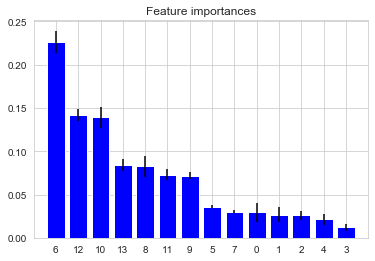

In [269]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

<blockquote> Le résultat ci-dessus nous montre que la feature la plus décisive est la respiration suivi par les déplacements du poignet </blockquote> 

In [278]:
algorithme = MLPClassifier(alpha=1, max_iter = 1000)
score = get_score(algorithme, *train_test_split(X, y, random_state=1234))
performances[algorithme] = score
score

fitting :
MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
X_train:(97116, 14) , X_test:(32373, 14) ,  y_train:(97116,) ,  y_test:(32373,)


0.6135977512124301

# Simple visualisation des performances des différents algos


In [280]:
dico_ordonne = OrderedDict(performances)

df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

,perf,algo
nom_algo,,
RandomForestRegressor,0.835617,"(DecisionTreeRegressor(criterion='mse', max_de..."
DecisionTreeClassifier,0.845427,"DecisionTreeClassifier(class_weight=None, crit..."
ExtraTreesClassifier,0.892596,"(ExtraTreeClassifier(class_weight=None, criter..."
MLPClassifier,0.613598,"MLPClassifier(activation='relu', alpha=1, batc..."


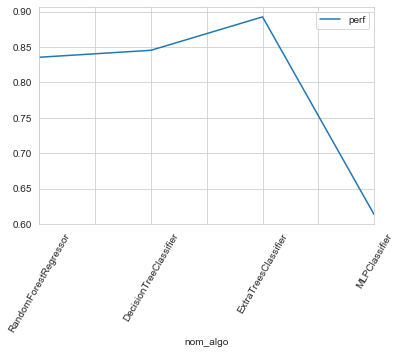

In [281]:
df[["perf"]].plot(kind='line', rot=60)


In [ ]:
def matrice_confusion(y_test,y_train):
    
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_train),
                                colorbar=True,
                                figsize= (15,15),
                                show_absolute=False,
                                show_normed=True)

In [283]:
matrice_confusion(y_test,y_train)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/marvin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)